# Choose the best car for you！
## Author: Toby Tao

I feel like every adult should get a car for themself in U.S. I think having a car that would give you more opportunities to go out and meet some interesting people with similar interests. Having a car would also enrich and enrich my life.

When I was 17 years old, I went to a high school in U.S. Unlike China, student here would drove to school. This made me very eager. After two years, I went to college. I found that houses near the school were so expensive. I can literally rent a better apartment 2 miles away from school for the same price. So, finally I am planning to get a car. 

Since my family already spent tons of money for my tuition, I just looking for a cheap car, but also with good quality. That meant that I had to go over the specific performance of each car. These properties can be reflected in the car's specifications. So in this interface, I created several visualizations of user interactions about each specific performance and cost of the vehicle.

The following are the indices of the car.

- Unnamed: car name
- mpg, or miles per gallon
- cyl Number of cylinders
- disp: Displacement
- hp: Gross horsepower
- drat: Rear axle ratio
- wt: Weight (lb/1000)
- qsec: 1/4 mile time
- am: Transmission Type
- gear: Number of forward gears
- carb: Number of carburetors

In [167]:
%matplotlib inline
%matplotlib widget

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bqplot
import ipywidgets
import geopandas
import contextily as ctx
from mpl_toolkits.mplot3d import Axes3D

# import everything before coding

Here we import a sample database of cars. As we can see, lots of indicators of car in this chart. 
Since this is only a sample dataset, the chart does not have all the car models. But the car in the chart are the more popular models, and we can get some conclusions from these brands

In [160]:
car = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
car
# car sample

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


This histogram shows the MPG for each car. MPG is the most important metric for me because MPG represents how much I need to spend on the car after I buy it. Higher mpg means the vehicle is more fuel-efficient. We can have a preliminary judgment in this chart. Except for the Fiat, most fuel-efficient cars are Japanese companies, like, Toyota and honda.

Text(0, 0.5, 'Miles-Per-Gallon(MPG)')

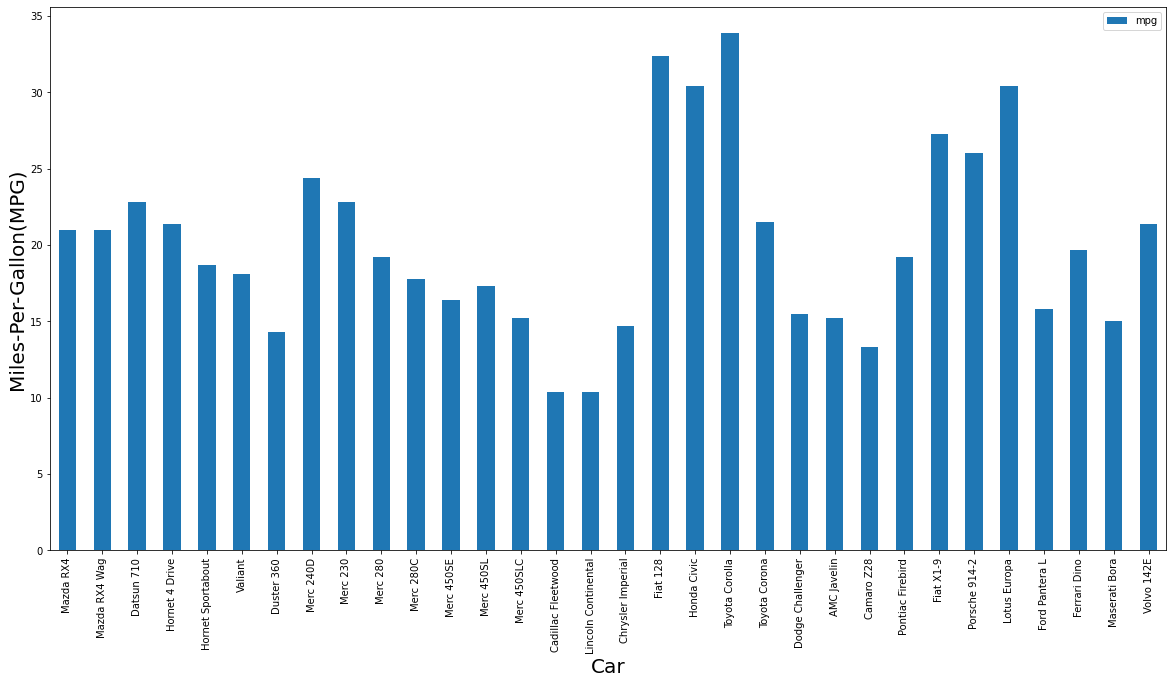

In [161]:
car.plot (x="Unnamed: 0", y='mpg', figsize=(20,10), kind='bar')
plt.xlabel('Car', fontsize=20) 
plt.ylabel('Miles-Per-Gallon(MPG)', fontsize=20)

# Interactive graph of car's indicators
In the image above, people can find the vehicle they want to know about by changing the car's name in the box. People can also choose the style they want in the box for this graph. If you don't know which bar represents which value, you can also find it by moving your mouse over the graph. The corresponding value will be displayed at the bottom of the chart.

In [168]:
column_names = ["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]

@ipywidgets.interact(car_name=car['Unnamed: 0'].unique(), style=plt.style.available) 

def make_hist(car_name, style):
    with plt.style.context(style):
        namegrab = car[car['Unnamed: 0']== car_name]
        group = namegrab.get(["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"])
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        ax.hist(group)
        print(group)
    plt.ylabel("Count")
    plt.title(car_name)
    fig.autofmt_xdate(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='car_name', options=('Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'H…

After confirming my choice is a Japanese brand, I wanted to know their price. So here, I imported a database about car values, and most cars are Japanese brands.

In [178]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv')

In [179]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


This is a one-dimensional plot that gives us each brand's median price. This way you can know how much you probably need to buy those brands' cars. BMW cars are almost twice as much as Japanese cars. LOL

Make
BMW       27089.830000
Honda     14514.200658
Nissan    13658.368687
Toyota    15628.160804
Name: Price, dtype: float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
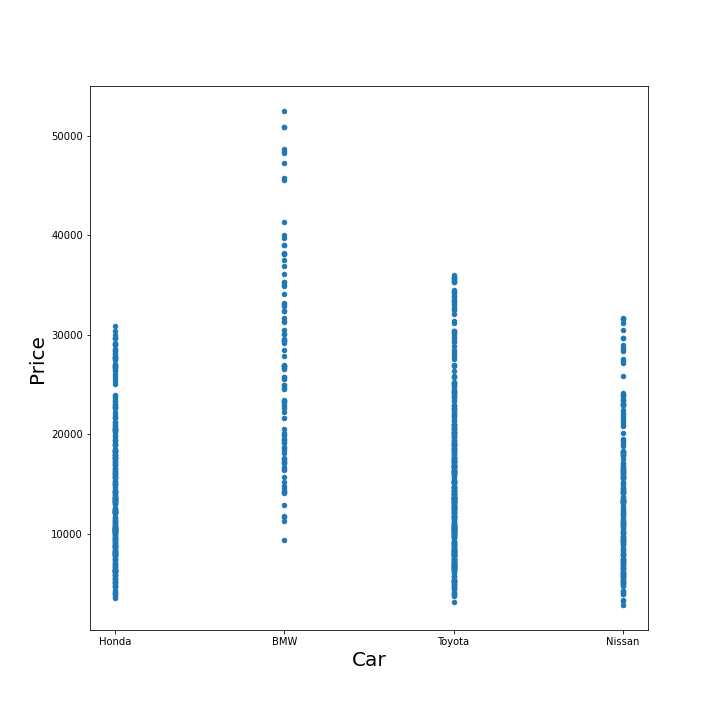

In [183]:
car_sales.plot (x="Make", y='Price', figsize=(10,10), kind='scatter')
plt.xlabel('Car', fontsize=20) 
plt.ylabel('Price', fontsize=20)

car_sales.groupby('Make')['Price'].mean()


Since some overlap values in the one-dimensional graph, I created a 3D chart here. The user needs to drag this 3-dimensional table to see the different views of the table. This table lets us know that different mileage corresponds to different prices. Also, we can see that most Japanese cars are 4-door, but there are also 3-door and 5-door.

/var/folders/q9/5kvzwq1s64b_3r_sxv2fm2t00000gn/T/ipykernel_70466/1544702955.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
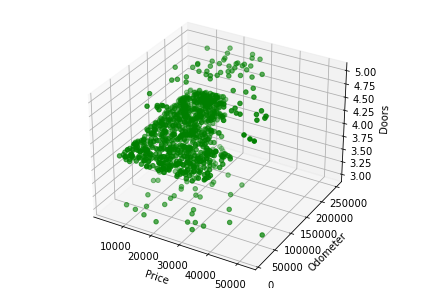

In [172]:
z,x,y = car_sales["Doors"], car_sales["Price"], car_sales["Odometer (KM)"] 
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(x, y, z, color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('Price')
ax.set_ylabel('Odometer')
ax.set_zlabel('Doors')
  
# displaying the plot
plt.show()